<a href="https://colab.research.google.com/github/tittae/leetcode/blob/main/Minimum_Area_Rectangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Area Rectangle

You're given an array of points plotted on a 2D graph (the xy-plane). Write a function that returns the minimum area of any rectangle that can be formed using any 4 of these points such that the rectangle's sides are parallel to the x and y axes (i.e., only rectangles with horizontal and vertical sides should be considered--no rectangles with diagonal sides). If no rectangle can be formed, your function should return `0`.

The input array will contain points represented by arrays of two integers `[x, y]`. The input array will never contain duplicate points.

Sample Input


```
points = 
[
  [1, 5],
  [5, 1],
  [4, 2],
  [2, 4],
  [2, 2],
  [1, 2],
  [4, 5],
  [2, 5],
  [-1, -2],
]
```


Sample Output

```
3
// The rectangle with corners [1, 5], [2, 5], [1, 2], and [2, 2]
// has the minimum area: 3.
```



## Solution (Edges finding)

### Conceptual Note

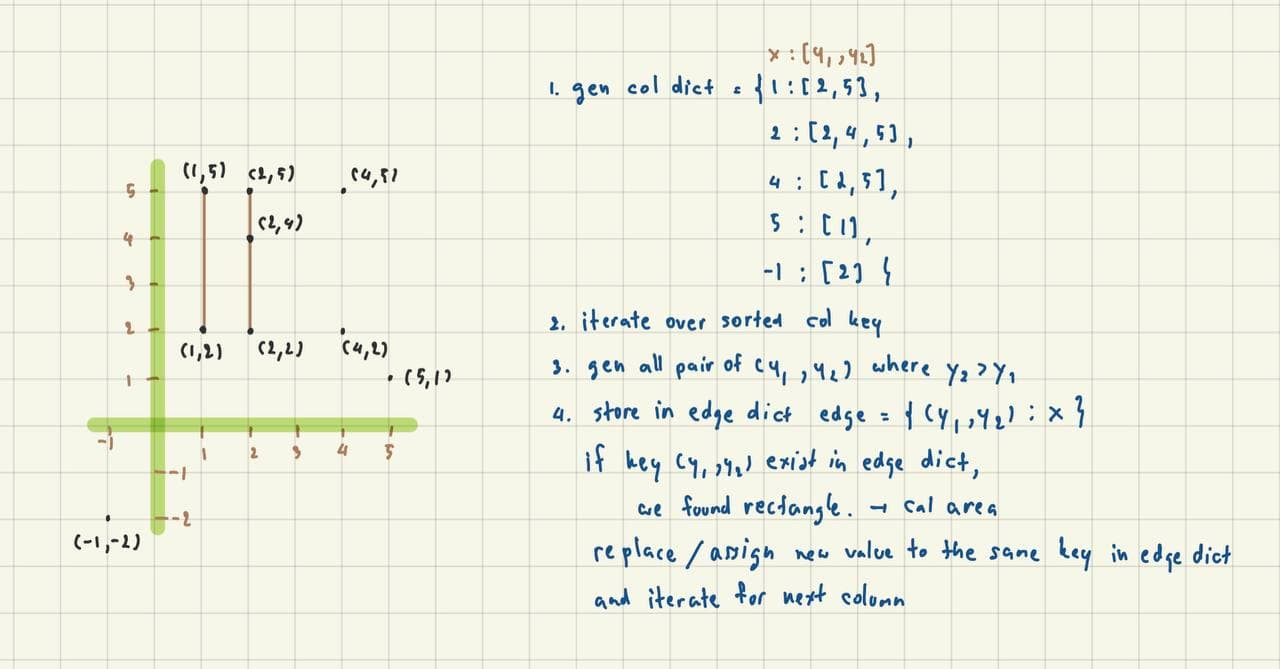

### Code

create columns

In [ ]:
# Time O(n^2)
# Space O(n)

def minimumAreaRectangle(points):
  columns = generate_columns(points)
  min_area = float('inf')
  edges_parallel_y = {}
  
  sorted_columns = sorted(columns.keys())

  # find edges
  for x in sorted_columns:
    y_in_columns = columns[x]
    y_in_columns.sort()

    for y1_idx, y1 in enumerate(y_in_columns):
      for y2 in y_in_columns[y1_idx + 1:]:
        edges_key = (y1, y2)

        if edges_key in edges_parallel_y:
          current_area = (x - edges_parallel_y[edges_key]) * (y2 -y1)
          min_area = min(current_area, min_area)

        edges_parallel_y[edges_key] = x

  return min_area if min_area != float('inf') else 0


def generate_columns(points):
  columns = {}
  for point in points:
    x, y = point
    if x not in columns:
      columns[x] = []
    columns[x].append(y)

  return columns

In [ ]:
points = [
  [1, 5],
  [5, 1],
  [4, 2],
  [2, 4],
  [2, 2],
  [1, 2],
  [4, 5],
  [2, 5],
  [-1, -2],
]

In [ ]:
print(minimumAreaRectangle(points))

3


In [ ]:
points = [
    [0, 1],
    [0, 0],
    [2, 1],
    [2, 0],
    [4, 0],
    [4, 1],
    [0, 2],
    [2, 2],
    [4, 2],
    [6, 0],
    [6, 1],
    [6, 2],
    [7, 1],
    [7, 0]
  ]

In [ ]:
print(minimumAreaRectangle(points))

1


Create row

In [ ]:
def minimumAreaRectangle(points):
  rows = generate_row(points)
  edges = {}
  min_area = float('inf')
  
  sorted_rows_key = sorted(rows.keys())
  for y in sorted_rows_key:
    x_in_row = rows[y]
    x_in_row.sort()
    
    for x1_idx, x1 in enumerate(x_in_row):
      for x2 in x_in_row[x1_idx + 1:]:
        edge_key = (x1, x2)
        if edge_key in edges:
          area = (y - edges[edge_key]) * (x2 - x1)
          min_area = min(area, min_area)

        edges[edge_key] = y

  return min_area if min_area != float('inf') else 0


def generate_row(points):
  row = {}
  for point in points:
    x, y = point
    if y not in row:
      row[y] = []
    row[y].append(x)

  return row

In [ ]:
points = [
  [1, 5],
  [5, 1],
  [4, 2],
  [2, 4],
  [2, 2],
  [1, 2],
  [4, 5],
  [2, 5],
  [-1, -2],
]

In [ ]:
print(minimumAreaRectangle(points))

3


## Solution 2 (Diagonal point pairs)

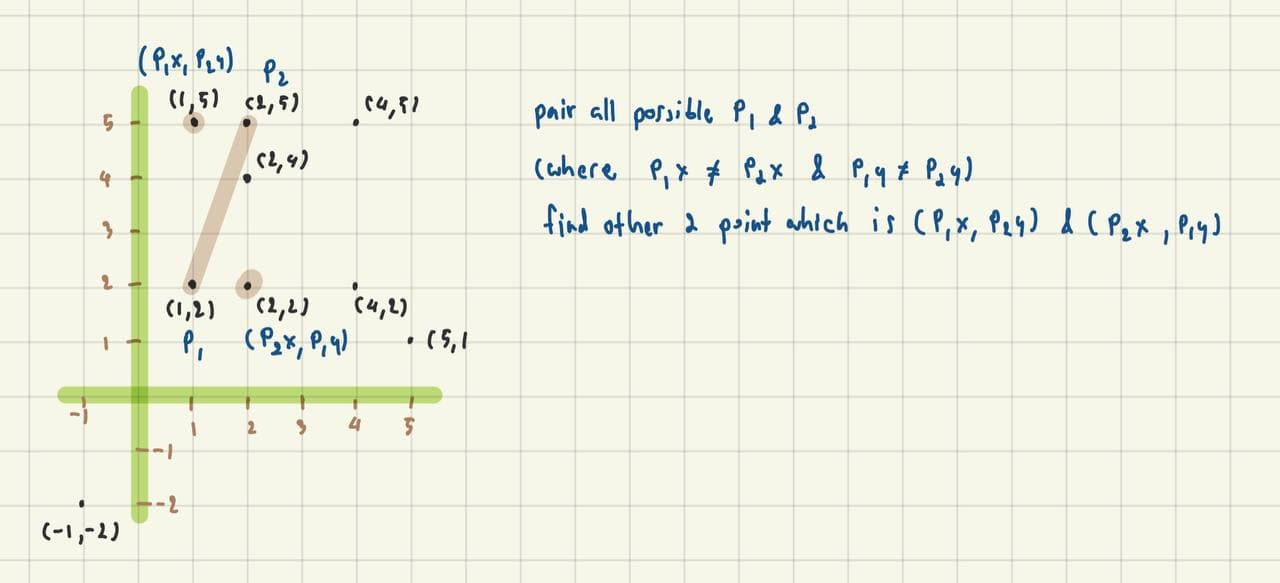

In [ ]:
# Time O(n^2)
# Space O(n)

def minimumAreaRectangle(points):
	point_set = create_set(points)
	min_area = float('inf')

	for p1 in points:
		p1x, p1y = p1
		for p2 in points:
			p2x, p2y = p2
			if p1x != p2x and p1y != p2y:
				if (p1x, p2y) in point_set and (p2x, p1y) in point_set:
					area = abs(p1x - p2x) * abs(p1y - p2y)
					min_area = min(area, min_area)
	
	return min_area if min_area != float('inf') else 0

def create_set(points):
	point_set = set()
	for point in points:
		point_set.add((point[0], point[1]))
	
	return point_set

In [ ]:
points = [
  [1, 5],
  [5, 1],
  [4, 2],
  [2, 4],
  [2, 2],
  [1, 2],
  [4, 5],
  [2, 5],
  [-1, -2],
]

In [ ]:
print(minimumAreaRectangle(points))

3
